# Exercise 2 – Determining the spreading of epidemics

### Federico Agostini, Federico Bottaro, Gianmarco Pompeo 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx

In [2]:
# create adjacency matrix for network A
index_i_A, index_j_A = np.loadtxt("net1.txt", dtype=np.int16, unpack=True)
dim = max(index_i_A.max(), index_j_A.max())+1
NetA_matrix = np.zeros((dim, dim))
for i,j in zip(index_i_A, index_j_A):
    # the adjacency matrix needs to be symmetric
    NetA_matrix[i, j] = 1
    NetA_matrix[j, i] = 1

In [3]:
# create adjacency matrix for network B
index_i_B, index_j_B = np.loadtxt("net2.txt", dtype=np.int16, unpack=True)
dim = max(index_i_B.max(), index_j_B.max())+1
NetB_matrix = np.zeros((dim, dim))
for i,j in zip(index_i_B, index_j_B):
    # the adjacency matrix needs to be symmetric
    NetB_matrix[i, j] = 1
    NetB_matrix[j, i] = 1

In [4]:
NetA = nx.from_numpy_array(NetA_matrix)
NetB = nx.from_numpy_array(NetB_matrix)

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


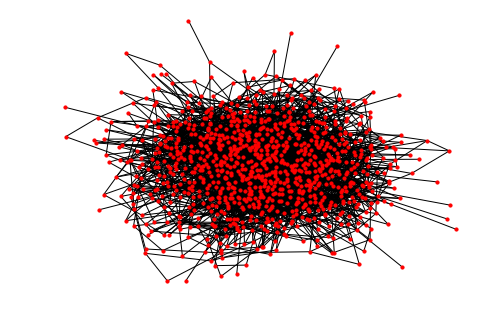

In [5]:
nx.draw(NetA, node_size=10)

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


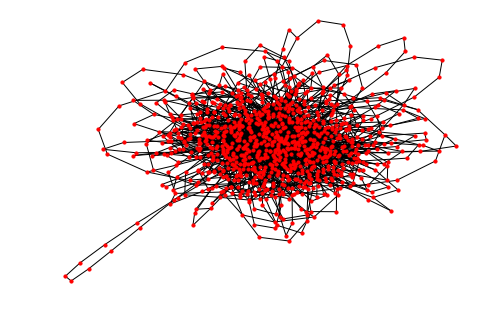

In [6]:
nx.draw(NetB, node_size=10)

## Task 1
Using the two networks provided in (A), calculate the epidemic threshold in the **SIS** dynamics for the homogenous, heterogenous and quenched mean-field approximations for $\mu=0.5$

In [7]:
# Preliminaries

mu = 0.5

## Average degree

### Network A
node_deg = NetA.degree()
node_deg = list(node_deg)
NetA_degree = np.array([x[1] for x in node_deg])
NetA_average_degree   = NetA_degree.mean() # <k_A>
NetA_average_degree_2 = np.mean(np.power(NetA_degree, 2)) # <(k_A)**2>
NetA_max_eigenvalue = np.max(np.real(np.linalg.eig(NetA_matrix)[0]))
print(NetA_max_eigenvalue)

### Network B
node_deg = NetB.degree()
node_deg = list(node_deg)
NetB_degree = np.array([x[1] for x in node_deg])
NetB_average_degree   = NetB_degree.mean() # <k_B>
NetB_average_degree_2 = np.mean(np.power(NetB_degree, 2)) # <(k_B)**2>
NetB_max_eigenvalue = np.max(np.real(np.linalg.eig(NetB_matrix)[0]))
print(NetB_max_eigenvalue)

6.284102805703304
7.530166187718354


In [8]:
# Homogeneus MF
NetA_lambda_MF = mu/NetA_average_degree
NetB_lambda_MF = mu/NetB_average_degree
print("HOMOGENEOUS MF")
print("Lambda_A =", NetA_lambda_MF)
print("Lambda_B =", NetB_lambda_MF)

HOMOGENEOUS MF
Lambda_A = 0.0971628449280995
Lambda_B = 0.13919821826280623


In [9]:
# Heterogeneous MF
NetA_lambda_HMF = mu*NetA_average_degree/NetA_average_degree_2
NetB_lambda_HMF = mu*NetB_average_degree/NetB_average_degree_2
print("HETEROGENEUOS MF")
print("Lambda_A =", NetA_lambda_HMF)
print("Lambda_B =", NetB_lambda_HMF)

HETEROGENEUOS MF
Lambda_A = 0.08160482080558198
Lambda_B = 0.07587663709336713


In [10]:
# Quenched MF
NetA_lambda_QMF = mu/NetA_max_eigenvalue
NetB_lambda_QMF = mu/NetB_max_eigenvalue
print("QUENCHED MF")
print("Lambda_A =", NetA_lambda_QMF)
print("Lambda_B =", NetB_lambda_QMF)

QUENCHED MF
Lambda_A = 0.07956585298798928
Lambda_B = 0.06639959697244084


## Task 2
Implement the (stochastic) SIS model in the two networks and simulate the entire phase diagram for $\mu=0.5$. Compare the three theoretical thresholds with the numerical results. 

*Suggestion: you need to simulate many (e.g. 100) simulations for each network and compare mean and std with the different analytical approximations.*

$$a_1 = \mu I$$
$$a_2 = \lambda \frac{I (N - I)}{N}$$

In [11]:
def A0(graph, status, m, l):
    """
    graph  = graph of the network
    status = array with status of the nodes (0-> sus, 1->inf)
    m = mu
    l = lambda
    """
    I = status.sum()
    A = [mu*I]
    for index, s in enumerate(status):
        # index of nodes connected to selected node
        connected_nodes = [n for n in graph[index]]
        # number of nodes sonnected to selected node
        N_node = len(connected_nodes)
        # number of 
        I_node = status[connected_nodes].sum()
        a = l*I_node*(N_node-I_Node)/N_node
        A.append(a)
    a0 = np.array(A).sum()
    return a0

In [12]:
# Network A

# 0 -> susceptible
# 1 -> infected
population = np.zeros(NetA_matrix.shape[0])
# infect one people at random
population[np.random.randint(0, population.shape[0])] = 1


In [13]:
np.random.seed(20190410)

***************lambda = 0.05


D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


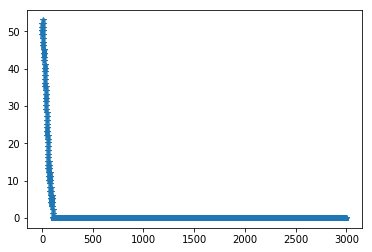

***************lambda = 0.06666666666666668


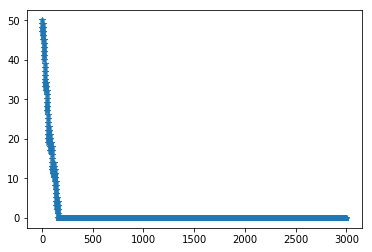

***************lambda = 0.08333333333333334


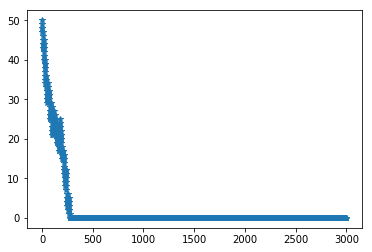

***************lambda = 0.1


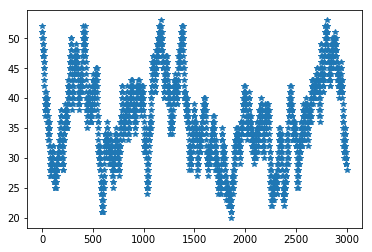

***************lambda = 0.11666666666666668


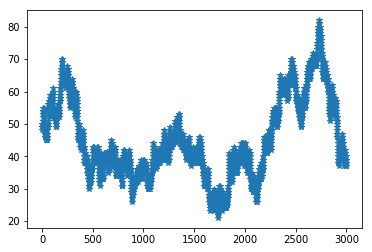

***************lambda = 0.13333333333333336


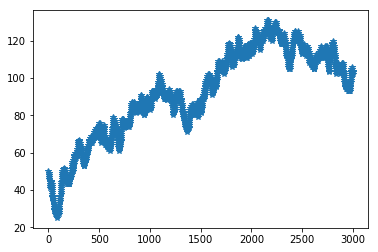

***************lambda = 0.15000000000000002


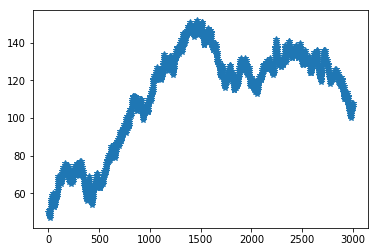

***************lambda = 0.16666666666666669


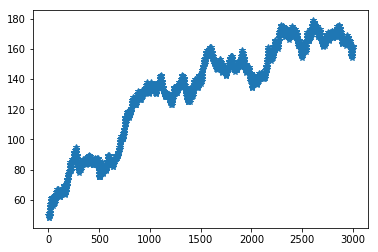

***************lambda = 0.18333333333333335


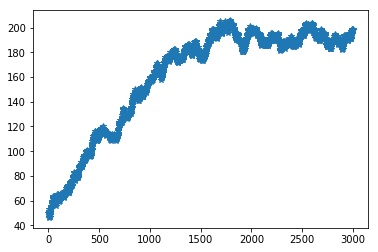

***************lambda = 0.2


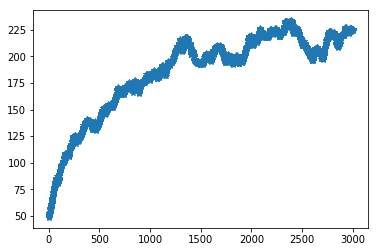

In [41]:
'''Gillespie 2.0'''
Lambda_test=np.linspace(0,.5,20)

iterations=1
#steps=10000#10*(int(dim**0.5))

net = NetB
dim = net.number_of_nodes()
index_i = index_i_B.copy()
index_j = index_j_B.copy()

infects = 50



l = 0.2
n_steps = 3000

lambdas = np.linspace(0.05,0.2, 10)
test = []


for l in lambdas:
    state = np.zeros(dim)
    # put Infected in the network
    state[np.random.choice(dim, infects, replace=False)] = 1
    I_number = [infects]
    print("***************lambda =", l)
    for steps in range(n_steps):
        n_I = state.sum() # #Infected
        n_S = dim - n_I   # #Susceptible
        n_N = dim
        link_matrix = np.zeros((dim,dim))
        for i,j in zip(index_i, index_j):
            if state[i] == state[j]:
                link_matrix[i,j] = 0
                link_matrix[j,i] = 0
            else:
                link_matrix[i,j] = 1
                link_matrix[j,i] = 1
        link_sum = 0.5*link_matrix.sum()
        a1  = mu*n_I
        a2  = l*link_sum#l*n_I*n_S/N_n
        a0  = a1+a2
        p_a1= a1/a0
        #print("P1 =", p_a1, "- P2 =", a2/a0)
        # select the reaction
        # reaction 1
        if np.random.rand() < p_a1:
            # select I at random
            I_index    = np.where(state == 1)[0]
            I_selected = np.random.choice(I_index)
            #print("I_selected =", I_selected)
            # I -> S
            state[I_selected] = 0

        # reaction 2
        else:
            # select I at random
            I_index = np.where(state == 1)[0]
            #np.random.shuffle(I_index)

            for k in I_index:
                neighbours = np.array([n for n in net.neighbors(k)])
                nn_infected = state[neighbours].sum()
                if nn_infected == len(neighbours): 
                    continue
                else:
                    np.random.shuffle(neighbours)
                    for NNs in neighbours:
                        if state[NNs] == 0:
                            state[NNs] = 1
                            break
                    break
        I_number.append(state.sum())  
    plt.plot(I_number, "*")
    plt.show()
    test.append(I_number[-1])

[0.0, 0.0, 0.0, 28.0, 38.0, 104.0, 106.0, 162.0, 198.0, 224.0]

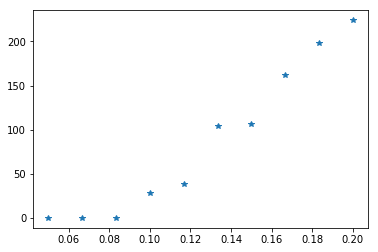

In [43]:
plt.plot(lambdas, test, "*")
test

************ lambda = 0.05 ************


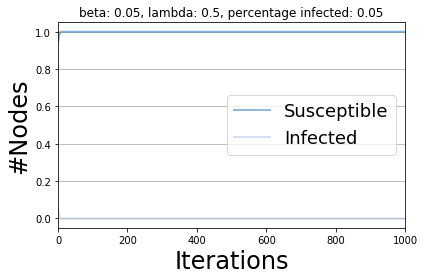

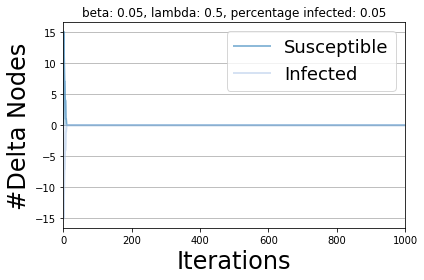

************ lambda = 0.05789473684210527 ************


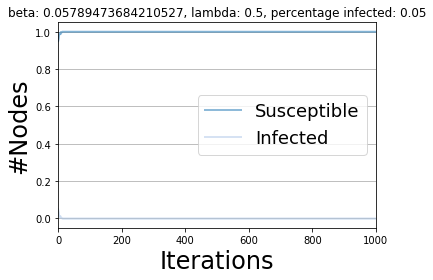

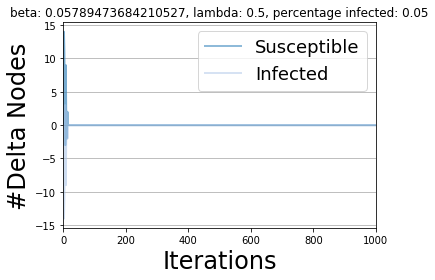

************ lambda = 0.06578947368421054 ************


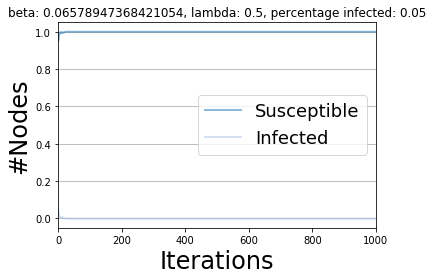

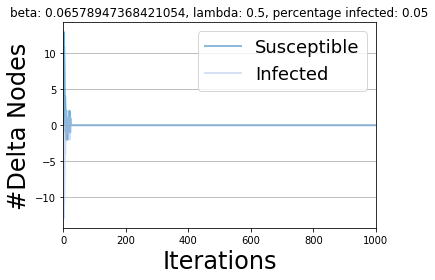

************ lambda = 0.0736842105263158 ************


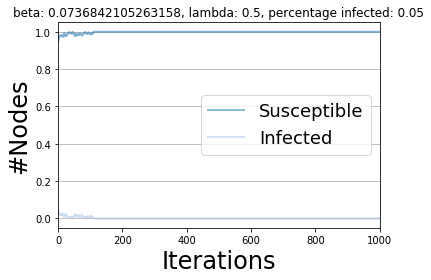

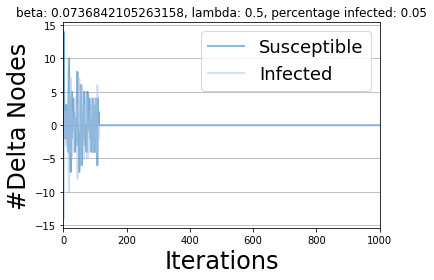

************ lambda = 0.08157894736842106 ************


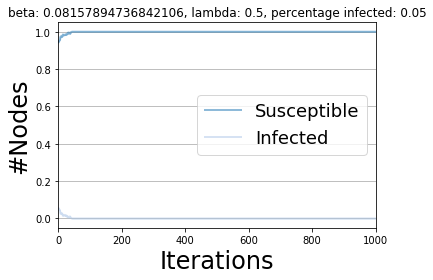

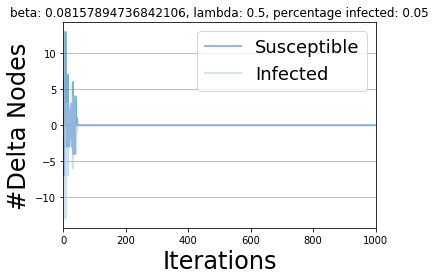

************ lambda = 0.08947368421052633 ************


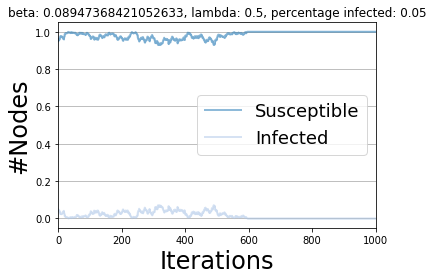

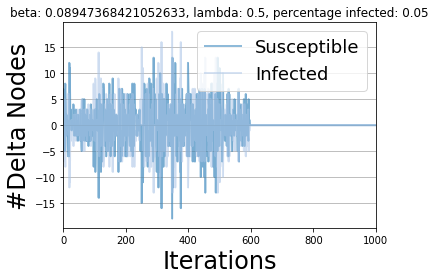

************ lambda = 0.09736842105263159 ************


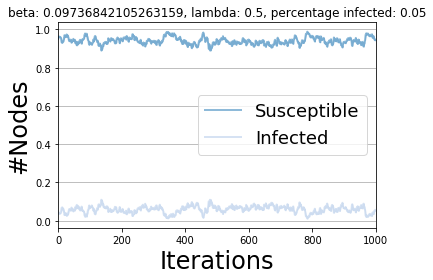

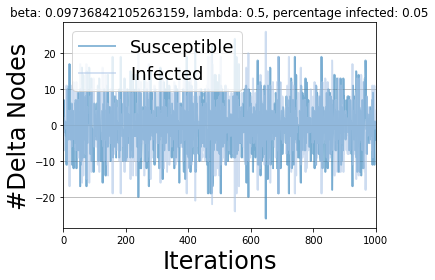

************ lambda = 0.10526315789473686 ************


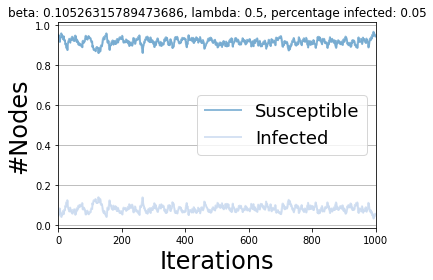

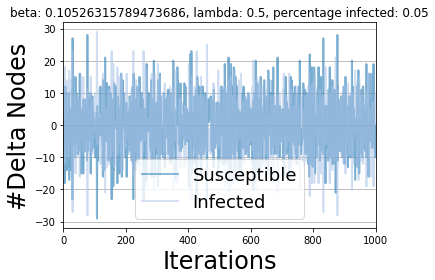

************ lambda = 0.11315789473684212 ************


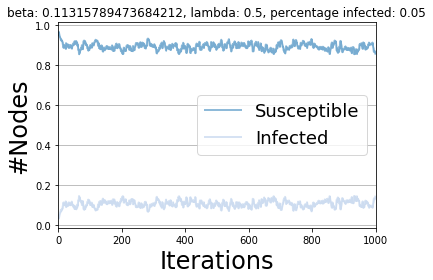

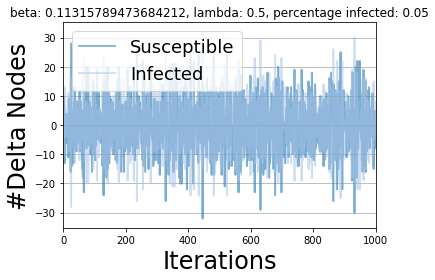

************ lambda = 0.12105263157894738 ************


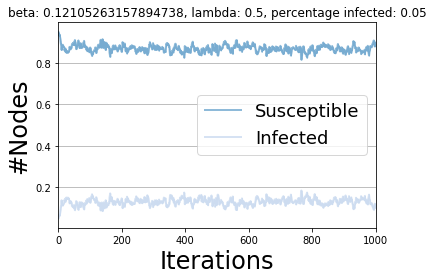

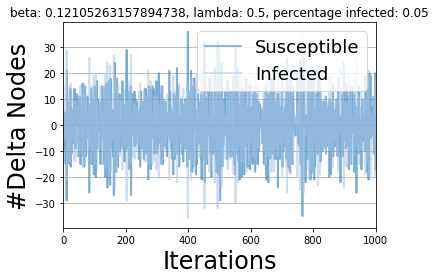

************ lambda = 0.12894736842105264 ************


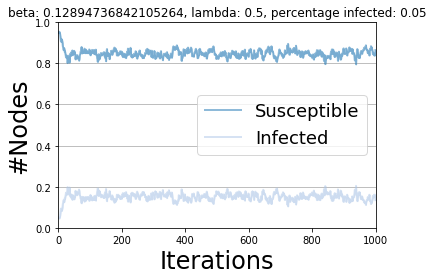

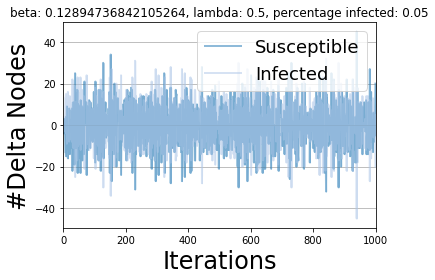

************ lambda = 0.13684210526315793 ************


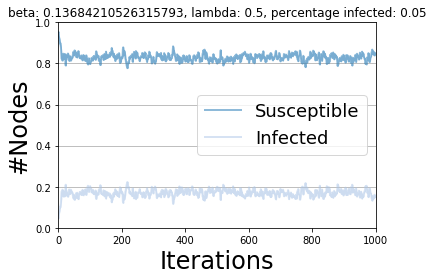

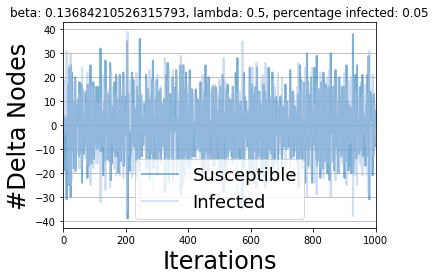

************ lambda = 0.14473684210526316 ************


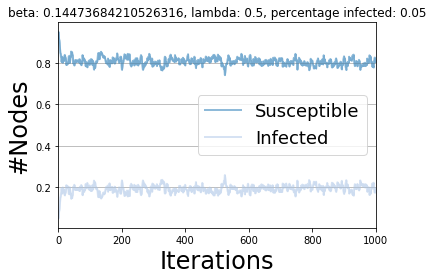

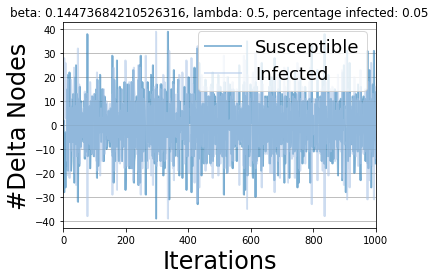

************ lambda = 0.15263157894736845 ************


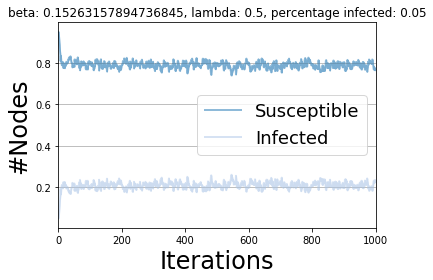

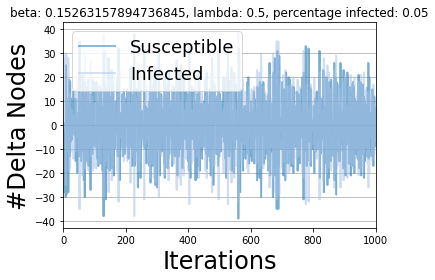

************ lambda = 0.1605263157894737 ************


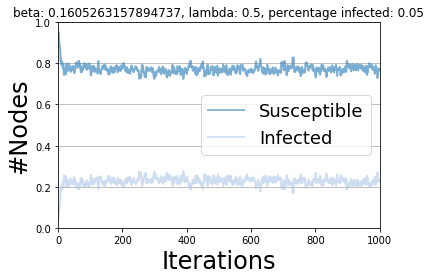

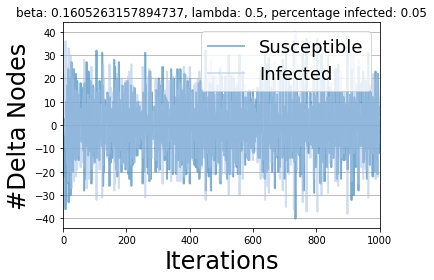

************ lambda = 0.16842105263157897 ************


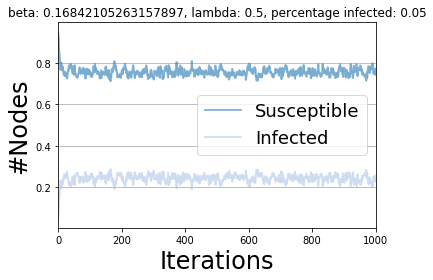

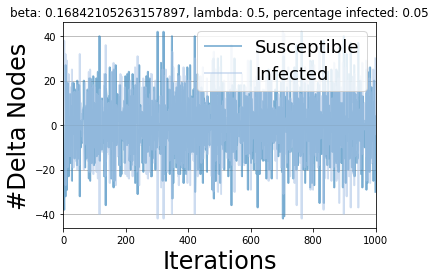

************ lambda = 0.17631578947368426 ************


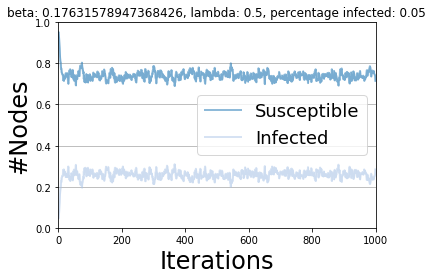

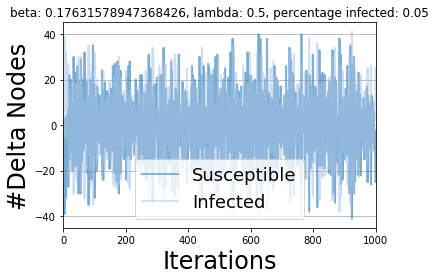

************ lambda = 0.1842105263157895 ************


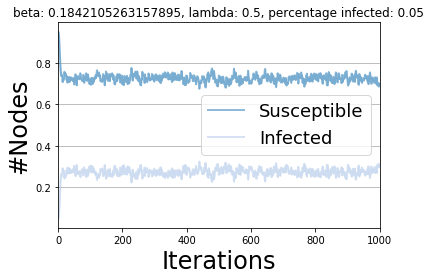

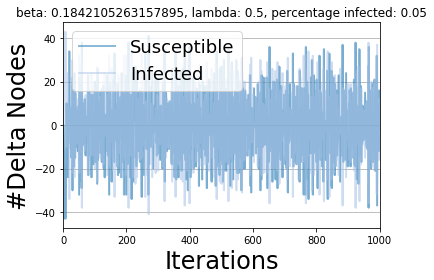

************ lambda = 0.19210526315789478 ************


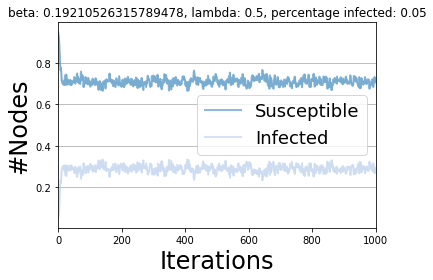

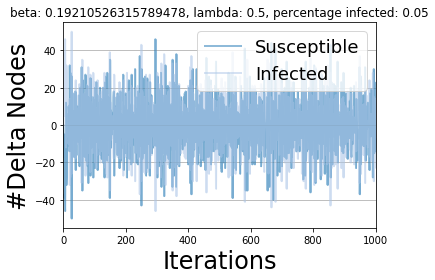

************ lambda = 0.2 ************


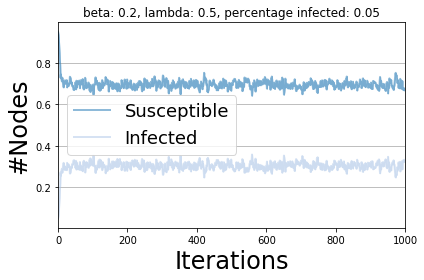

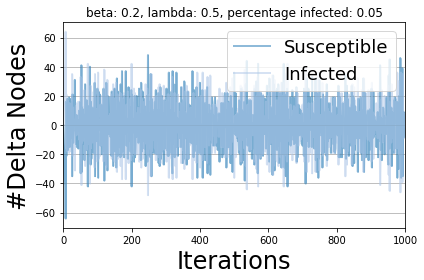

In [55]:
# https://ndlib.readthedocs.io/en/latest/index.html#
import ndlib.models.epidemics.SISModel as sis
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

net = NetB
it = 1000
lamb   = np.linspace(0.05, 0.2, 20)
for l in lamb:
    print("************ lambda =", l, "************")
    model = sis.SISModel(net)
    config = mc.Configuration()
    config.add_model_parameter("beta", l)    # infection probability
    config.add_model_parameter("lambda", mu) # recovery  probability
    config.add_model_parameter("percentage_infected", 0.05) # % of infected
    model.set_initial_status(config)

    # Simulation
    iterations = model.iteration_bunch(it)
    trends = model.build_trends(iterations)
    viz = DiffusionTrend(model, trends)
    p = viz.plot()
    viz2 = DiffusionPrevalence(model, trends)
    p2 = viz2.plot()
    plt.show()


## Task 3
Characterize the two networks in terms of their connectivity, degree distribution, page-rank distribution, clustering coefficient. Comment the results at the light of point 2 (e.g. how structural properties of the networks and results of the epidemic dynamics are related?)

In [ ]:
'''connected component'''
print("number of connected component:")
print("Network A: ",nx.number_connected_components(NetA))
print("Network B: ",nx.number_connected_components(NetB))

In [ ]:
'''connectivity'''
print("Network A: ",nx.edge_connectivity(NetA))
print("Network B: ",nx.edge_connectivity(NetB))

In [ ]:
'''node degree'''
print("Network A: ")
node_deg = NetA.degree()
node_deg = list(node_deg)
deg = [x[1] for x in node_deg]

# plot the node degree distribution as histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(deg, bins=20, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Node degree", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

'''node degree'''
print("Network B: ")
node_deg = NetB.degree()
node_deg = list(node_deg)
deg = [x[1] for x in node_deg]

# plot the node degree distribution as histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(deg, bins=20, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Node degree", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

In [ ]:
'''pagerank'''
print("Network A: ")
pagerankA=nx.pagerank(NetA).values()

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(pagerankA, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("pagerank", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

print("Network B: ")
pagerankB=nx.pagerank(NetB).values()

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(pagerankB, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("pagerank", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

In [ ]:
'''clustering coefficient'''
cluster_coeff = nx.clustering(NetA)
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(cluster_coeff.values(), histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Cluster coefficient", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()

cluster_coeff = nx.clustering(NetB)
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(cluster_coeff.values(), histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Cluster coefficient", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.show()